In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from datasets.carla import *
from datasets.nuscenes import *

from models.baseline import *
from tools.utils import *

from time import time
from tqdm import tqdm

%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
model = Evidential([7], backbone="lss")
model.load(torch.load("../outputs/carla/lss_evidential_aug/19.pt"))

Loaded pretrained weights for efficientnet-b0


In [28]:
carla_data = CarlaDataset("../../data/carla/val_aug", False)

In [29]:
images, intrinsics, extrinsics, labels, ood = carla_data[64]
images = images[None]
intrinsics = intrinsics[None]
extrinsics = extrinsics[None]
labels = labels[None]

In [30]:
alpha = model(images, intrinsics, extrinsics).detach().cpu()
probs = model.activate(alpha)
vac = model.epistemic(alpha)

(-0.5, 199.5, 199.5, -0.5)

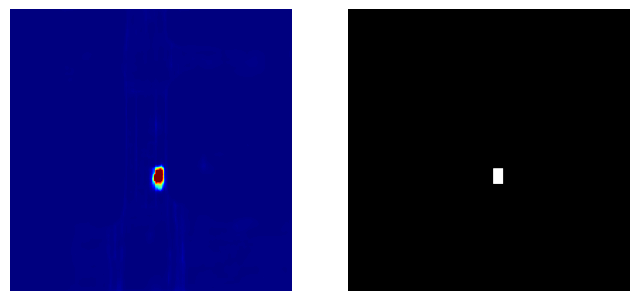

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[1].imshow(1 - ood)
axs[0].imshow(vac[0, 0], cmap='jet')


axs[0].axis('off')
axs[1].axis('off')

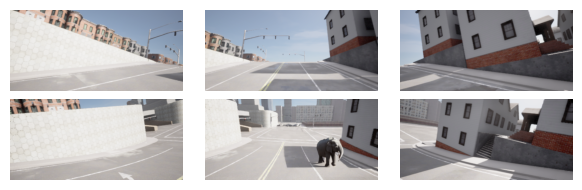

In [34]:
fig, axes = plt.subplots(2, 3, figsize=(6, 2))

for i, ax in enumerate(axes.flatten()):
    ax.axis('off')
    image = images[0, i].permute(1, 2, 0).numpy()
    if i > 2:
        image = np.fliplr(image)
    ax.imshow(image)

plt.tight_layout()